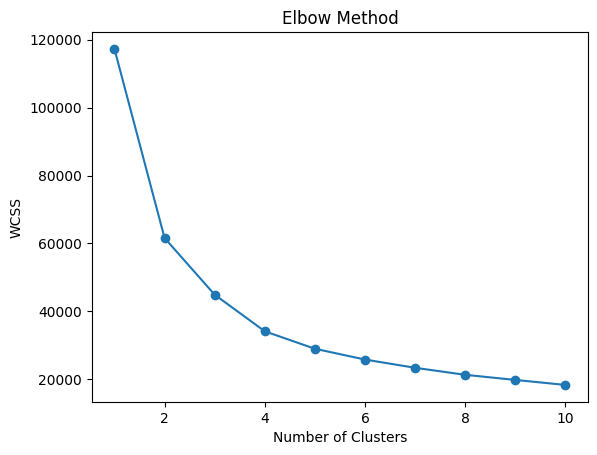

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your soil data
soil_data = pd.read_csv('../datasets/veris_proj.csv')

# Select relevant soil variables
X = soil_data[['F3', 'F4', 'F5']]

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [15]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('../datasets/veris_proj.csv')
# Extract features from the dataset
X = data[['F3', 'F4', 'F5']]

# Create a PCA model with the desired number of components
pca = PCA(n_components=2)  

# Fit PCA to the data and transform the data to the new feature space
reduced_data = pca.fit_transform(X)



In [1]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Fit K-means clustering algorithm to the reduced data
kmeans = KMeans(n_clusters=4, random_state=42) 
kmeans.fit(reduced_data)
cluster_labels = kmeans.labels_
# Visualize the clusters in the reduced feature space
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering in PCA-reduced Feature Space')
plt.colorbar(label='Cluster')
plt.show()


NameError: name 'reduced_data' is not defined

In [24]:
import pandas as pd
# Combine the soil data and cluster labels into a single DataFrame
soil_with_clusters = pd.DataFrame(data, columns=['F3', 'F4', 'F5'])
soil_with_clusters['Cluster'] = cluster_labels

# Compute the mean values of EC shallow, EC depth, and elevation for each cluster
cluster_means = soil_with_clusters.groupby('Cluster').mean()

# Display the mean values for each cluster
print("Mean values for each cluster:")
print(cluster_means)


Mean values for each cluster:
               F3        F4         F5
Cluster                               
0        5.628403  9.540247  54.683052
1        3.744307  7.188985  51.049950
2        2.990086  6.170337  54.665392
3        1.675626  3.678217  50.862107


In [26]:
import pandas as pd
data['class'] = kmeans.labels_

# Map cluster labels to class names
class_names = {0: 'a', 1: 'b', 2: 'c', 3: 'd'} 

# Assign class names based on cluster labels
data['class'] = data['class'].map(class_names)

print(data.head())

          F1         F2    F3    F4      F5  ID              X             Y  \
0 -84.761887  31.184496  10.3  15.9  56.280  13  713276.744997  3.452207e+06   
1 -84.761910  31.184556   9.3  15.7  56.557  15  713274.409038  3.452213e+06   
2 -84.761918  31.184575   8.5  15.4  56.635  16  713273.544900  3.452215e+06   
3 -84.761926  31.184595   7.5  14.6  56.676  17  713272.737728  3.452218e+06   
4 -84.761935  31.184615   6.7  13.1  56.746  18  713271.902858  3.452220e+06   

  class  
0     a  
1     a  
2     a  
3     a  
4     a  


In [27]:
class_counts = data['class'].value_counts()
# Print the counts for each class
print("Class Counts:")
print(class_counts)

Class Counts:
class
c    2552
d    2355
a    1866
b    1616
Name: count, dtype: int64
